In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
FILE_PATH = '/content/drive/MyDrive/own/Schneider/Assignment 2/data/input/netflix_titles.csv'
df = pd.read_csv(FILE_PATH)
description_raw = list(df.description)

In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import scipy as sc


import flair

In [34]:
from sklearn.cluster import KMeans


# Gensim doc2vec

In [ ]:
tokenized_sent = []
for s in description_raw:
    tokenized_sent.append(word_tokenize(s.lower()))

In [10]:
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]

In [14]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [15]:
model = Doc2Vec(
    tagged_data, 
    vector_size = 20, 
    window = 2, 
    min_count = 1, 
    epochs = 100
)

In [19]:
v = model.infer_vector(word_tokenize(description_raw[0].lower()))

In [21]:
model.docvecs.most_similar(positive=[v])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(0, 0.9906122088432312),
 (5242, 0.7579985857009888),
 (342, 0.7502436637878418),
 (4853, 0.7324721813201904),
 (2876, 0.7262331247329712),
 (890, 0.7083187103271484),
 (1737, 0.7040653228759766),
 (1423, 0.703311562538147),
 (2372, 0.6906481981277466),
 (3484, 0.6902434825897217)]

# SentenceBert

In [ ]:
!pip install sentence-transformers

In [23]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

100%|██████████| 405M/405M [00:20<00:00, 20.2MB/s]


In [26]:
sentence_embeddings = sbert_model.encode(description_raw)
sent_emb = {df.loc[idx, 'show_id']: _ for idx, _ in enumerate(sentence_embeddings)}
pickle.dump(sent_emb, open("/content/drive/MyDrive/own/Schneider/Assignment 2/data/sent_emd.pkl", 'wb'))

In [ ]:
kmeans = KMeans(
    n_clusters = 5,
    n_init = 10, 
    max_iter = 500,
    verbose = 1
).fit(sentence_embeddings)

(array([1260.,    0., 1353.,    0.,    0., 1382.,    0., 1069.,    0.,
        1170.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

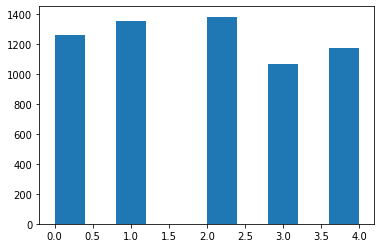

In [39]:
plt.hist    (kmeans.labels_)

In [ ]:
from sent2vec.vectorizer import Vectorizer

sentences = [
    "This is an awesome book to learn NLP.",
    "DistilBERT is an amazing NLP model.",
    "We can interchangeably use embedding, encoding, or vectorizing.",
]
vectorizer = Vectorizer()
vectorizer.bert(sentences)
vectors = vectorizer.vectors

In [ ]:
vectors = vectorizer.bert(description_raw).vectors